In [22]:
# !pip install fasttext
# !pip install konlpy
# # !pip install soynlp

In [23]:
# !pip install pandas

# 1. EDA(포괄적인 데이터 탐색)

In [24]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel('./neutral_rm_emotion_data.xlsx')

In [26]:
data

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,6935
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,12521
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,12566
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,10090
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,11107
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,11617
...,...,...,...,...,...,...,...
72803,나 엘리베이터에 갇혔어.,공포,NaN,NaN,NaN,NaN,NaN
72804,하지만 기분이 나쁜 걸 어떡해?,분노,NaN,NaN,NaN,NaN,NaN
72805,자취방 엘리베이턴데 정전인가봐.,공포,NaN,NaN,NaN,NaN,NaN
72806,나 드디어 프로젝트 끝났어!,행복,NaN,NaN,NaN,NaN,NaN


In [27]:
data = data.loc[:,:'Emotion']

In [28]:
data

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
72803,나 엘리베이터에 갇혔어.,공포
72804,하지만 기분이 나쁜 걸 어떡해?,분노
72805,자취방 엘리베이턴데 정전인가봐.,공포
72806,나 드디어 프로젝트 끝났어!,행복


In [29]:
categories = data['Emotion'].unique()
print(categories)

['공포' '슬픔' '분노' '놀람' '중립' '행복' '혐오']


In [30]:
data['Emotion'].value_counts()

분노    12566
놀람    12521
행복    11617
중립    11107
슬픔    10090
혐오     7972
공포     6935
Name: Emotion, dtype: int64

# 2. 데이터 분리와 EDA



In [31]:
from sklearn.model_selection import train_test_split
                                                         
data_train, data_test = train_test_split(data, test_size=0.3, shuffle=True)
data_test, data_validation = train_test_split(data_test, test_size=0.5, shuffle=True)

print(data_train.shape)
print(data_test.shape)
print(data_validation.shape)

(50965, 2)
(10921, 2)
(10922, 2)


In [32]:
print(data_train.head())
print(data_test.head())
print(data_validation.head())

                                   Sentence Emotion
15938                            참 개같은 논리다.      분노
29497                       머한사람들은 배워먹은게없다.      혐오
10549                   이게 팩트라면 애플 휴대폰 사야겠다      놀람
64161  시간이 지나도 주식이 오르지 않고 떨어져서 너무 속상해. 망했어.      슬픔
67571            아마 뭐 목줄을 다시 사야될 때가 온 거였겠지.      놀람
                           Sentence Emotion
7128            이강인 아니라는데 왜 저게 베댓이냐      놀람
53796      넌 진짜 좀 자. 장은 내가 나중에 봐올게.      중립
7904             저 선수가 저 발로도 골을 넣네요      놀람
1691   다이어트 할 때 굶으면 몸이 많이 상할 거 같아서요      공포
72614          친구 추천을 받고 친구 따라서 샀어.      슬픔
                                  Sentence Emotion
33345                       설현을 까는건 당연한 거임      혐오
5837                 마동석 결혼한 줄 알았는데 총각이었네.      놀람
42317                            나 시인이야!!!      분노
6760   헐 ㅠㅠㅠ 드디어 공중파 예능이노 퓨 ㅠㅠㅜㅜㅜㅜㅜㅠㅠㅠㅠㅠㅠㅠ      놀람
23800    : 병규형이 승여비를누르고 올스타 최다득표의 영예를안았습니다      행복


In [33]:
X_train = data_train.loc[:]['Sentence']
y_train = data_train.loc[:]['Emotion']

X_test = data_test.loc[:]['Sentence']
y_test = data_test.loc[:]['Emotion']

X_validation = data_validation.loc[:]['Sentence']
y_validation = data_validation.loc[:]['Emotion']

In [34]:
X_train[2]

'아직너무초기라서 그런거죠?'

In [35]:
print("훈련용 데이터 문장 예시:",X_train[2])
print("훈련용 label 예시:",y_train[2])

print("테스트 데이터 문장 갯수:",len(X_test))
print("테스트 label 갯수:",len(y_test))

훈련용 데이터 문장 예시: 아직너무초기라서 그런거죠?
훈련용 label 예시: 공포
테스트 데이터 문장 갯수: 10921
테스트 label 갯수: 10921


훈련용 문장의 최대 길이 : 299
훈련용 문장의 평균 길이 : 24.0779750809379


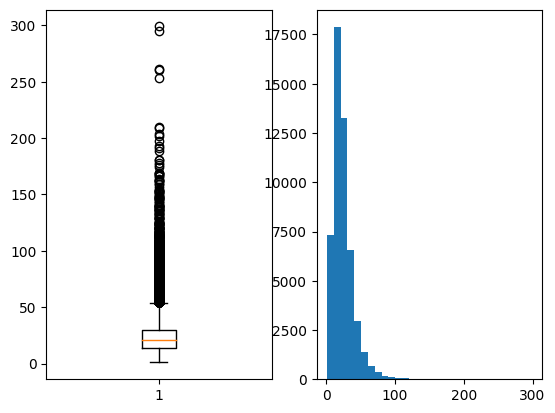

테스트 문장의 최대 길이 : 200
테스트 문장의 평균 길이 : 24.25748557824375


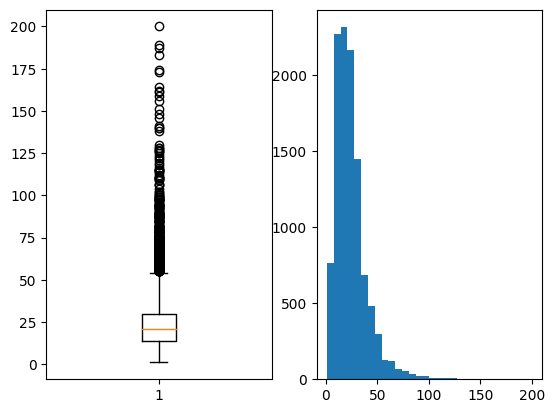

In [36]:
len_result = [len(s) for s in X_train]
print('훈련용 문장의 최대 길이 : {}'.format(np.max(len_result)))
print('훈련용 문장의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result,bins=30)
plt.show()

len_result2 = [len(s) for s in X_test]
print('테스트 문장의 최대 길이 : {}'.format(np.max(len_result2)))
print('테스트 문장의 평균 길이 : {}'.format(np.mean(len_result2)))

plt.subplot(1,2,1)
plt.boxplot(len_result2)
plt.subplot(1,2,2)
plt.hist(len_result2,bins=30)
plt.show()

In [37]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("훈련용 데이터 레이블에 대한 빈도:")
print(np.asarray((unique_elements, counts_elements)))

훈련용 데이터 레이블에 대한 빈도:
[['공포' '놀람' '분노' '슬픔' '중립' '행복' '혐오']
 [4885 8795 8794 7014 7762 8159 5556]]


In [38]:
import tweepy 
# !pip freeze > requirements.txt
# !pip install tweepy==3.10.0
print(tweepy.__version__)

3.10.0


In [39]:
# pip list

## okt사용하여 토큰화 

In [40]:
from konlpy.tag import Okt
from soynlp.normalizer import *
okt = Okt()

In [41]:
#test shell
print(okt.morphs('이게 대체 무슨말이야?????')) #okt 테스트
# print(emoticon_normalize('이게 대체 무슨말이야?????', num_repeats=2)) #soynlp 테스트
# print(okt.pos(emoticon_normalize('이게 대체 무슨말이야?????', num_repeats=3))) #okt + soynlp 테스트

['이', '게', '대체', '무슨', '말', '이야', '?????']


In [42]:
X_train_tokenize = []
X_test_tokenize = []
X_validation_tokenize = []
for i in X_train:
    X_train_tokenize.append(okt.morphs(i))
#     X_train_tokenize.append(okt.morphs(emoticon_normalize(i, num_repeats=2))) #norm옵션 : 그래욬ㅋㅋ -> 그래요 처럼 변환해주는 옵션 / stem옵션 : 원형을 찾아주는 옵션 (그래요 -> 그렇다)

for i in X_test:
    X_test_tokenize.append(okt.morphs(i))
#     X_test_tokenize.append(okt.morphs(emoticon_normalize(i, num_repeats=2)))

for i in X_validation:
    X_validation_tokenize.append(okt.morphs(i))
#     X_validation_tokenize.append(okt.morphs(emoticon_normalize(i, num_repeats=2)))

In [43]:
for i in X_train_tokenize[:2]:
    print("훈련용 토큰화 결과: ", i)
for i in X_test_tokenize[:2]:
    print("테스트용 토큰화 결과: ", i)
for i in X_validation_tokenize[:2]:
    print("검증용 토큰화 결과: ", i)

훈련용 토큰화 결과:  ['참', '개', '같은', '논리', '다', '.']
훈련용 토큰화 결과:  ['머', '한', '사람', '들', '은', '배워', '먹은게', '없다', '.']
테스트용 토큰화 결과:  ['이강인', '아니라는데', '왜', '저', '게', '베댓', '이냐']
테스트용 토큰화 결과:  ['넌', '진짜', '좀', '자', '.', '장', '은', '내', '가', '나중', '에', '봐', '올게', '.']
검증용 토큰화 결과:  ['설현', '을', '까는건', '당연한', '거임']
검증용 토큰화 결과:  ['마동석', '결혼', '한', '줄', '알았는데', '총각', '이었네', '.']


In [44]:
# for i in X_train_tokenize:
#   print(i)
# print(X_train_tokenize)

In [45]:
train_len = [len(s) for s in X_train_tokenize]
for i in range(3):
    print(X_train_tokenize[i] ,":" ,train_len[i])

test_len = [len(s) for s in X_test_tokenize]
for i in range(3):
    print(X_test_tokenize[i] ,":" ,test_len[i])

['참', '개', '같은', '논리', '다', '.'] : 6
['머', '한', '사람', '들', '은', '배워', '먹은게', '없다', '.'] : 9
['이', '게', '팩트', '라면', '애플', '휴대폰', '사야겠다'] : 7
['이강인', '아니라는데', '왜', '저', '게', '베댓', '이냐'] : 7
['넌', '진짜', '좀', '자', '.', '장', '은', '내', '가', '나중', '에', '봐', '올게', '.'] : 14
['저', '선수', '가', '저', '발', '로', '도', '골', '을', '넣네요'] : 10


토큰화된 문장의 최대 토큰의 갯수 : 113
토큰화된 문장의 평균 토큰의 갯수 : 10.06282743058962


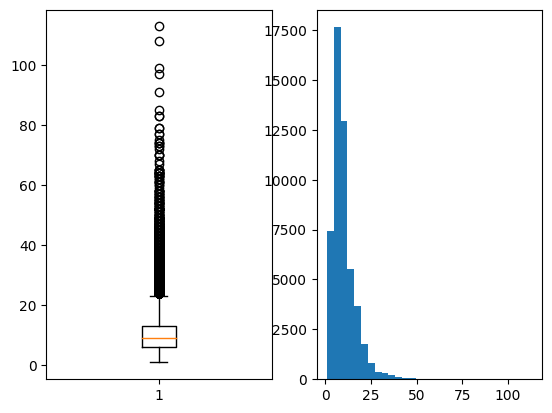

In [46]:
print('토큰화된 문장의 최대 토큰의 갯수 : {}'.format(np.max(train_len)))
print('토큰화된 문장의 평균 토큰의 갯수 : {}'.format(np.mean(train_len)))
plt.subplot(1,2,1)
plt.boxplot(train_len)
plt.subplot(1,2,2)
plt.hist(train_len,bins=30)
plt.show()

토큰화된 문장의 최대 토큰의 갯수 : 88
토큰화된 문장의 평균 토큰의 갯수 : 10.14971156487501


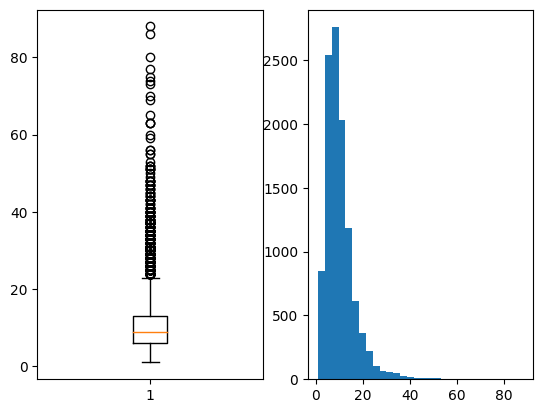

In [47]:
print('토큰화된 문장의 최대 토큰의 갯수 : {}'.format(np.max(test_len)))
print('토큰화된 문장의 평균 토큰의 갯수 : {}'.format(np.mean(test_len)))
plt.subplot(1,2,1)
plt.boxplot(test_len)
plt.subplot(1,2,2)
plt.hist(test_len,bins=30)
plt.show()

훈련용+테스트용 vocab_size 구하기

In [48]:
# # print(len(X_train_tokenize))
# print(len(X_test_tokenize))

In [49]:
# len(X_train_tokenize + X_test_tokenize)

In [50]:
# tokenize_all = []
# for i in X_train_tokenize + X_test_tokenize:
#     for j in i:
#         tokenize_all.append(j)

In [51]:
# vocab_size = len(set(tokenize_all))
# print(vocab_size)

## fasttext

In [52]:
import fasttext
ft_model=fasttext.FastText.load_model('./cc.ko.300.bin')
# ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')
ft_model.get_dimension()

300

In [53]:
import fasttext.util

fasttext.util.reduce_model(ft_model, 100)

In [54]:
# ft_model.get_dimension()

In [55]:
X_train_vector = []
X_test_vector = []
X_validation_vector = []

In [56]:
X_train_vector2=[]
for i in X_train_tokenize:
    temp = []
    temp2 = []
    for j in i:
        temp.append(ft_model.get_word_vector(j))
        temp2.append(j)
    X_train_vector.append(temp)
    X_train_vector2.append(temp2)
    
for i in X_test_tokenize:
    temp = []
    for j in i:
        temp.append(ft_model.get_word_vector(j))
    X_test_vector.append(temp)
    
for i in X_validation_tokenize:
    temp = []
    for j in i:
        temp.append(ft_model.get_word_vector(j))
    X_validation_vector.append(temp)

In [57]:
print(X_train_vector[0][0])

[-0.17395188 -0.5592499  -0.06274052 -0.01729032 -0.36971495 -0.34348136
 -0.10343862  0.44770473 -0.14177376 -0.15892524 -0.17625625  0.17397559
  0.42290878  0.28001636 -0.10278217  0.07825932  0.02354222 -0.05891432
  0.19244078 -0.16177262 -0.02835948  0.03338853 -0.11030499  0.02176503
 -0.03840126 -0.18189299 -0.24853784 -0.12170628  0.05361379  0.0388284
  0.17870358 -0.07850812 -0.07513924  0.0331715   0.2917008   0.11268285
  0.19807038  0.17073597  0.04219483 -0.06062938  0.03109896 -0.08927466
  0.02555734 -0.02033487 -0.00671926  0.2563307   0.03625286 -0.13846566
 -0.1067683  -0.2951119  -0.19306956  0.26093984  0.11874145 -0.11809891
 -0.0064369   0.01708436 -0.35481066  0.19168578 -0.05065218 -0.11315896
 -0.07615584  0.02439347 -0.11505485 -0.0800316  -0.0193148  -0.04787153
 -0.02939258  0.09866975  0.19272742  0.24106877  0.00572664 -0.14073387
  0.01834312  0.0089238  -0.04148801  0.00122817  0.01368016 -0.11996531
  0.10935668  0.00231421 -0.04617179 -0.09409046  0.

In [58]:
print(np.shape(X_train_vector))
print(np.shape(X_train_vector[0]))

(50965,)
(6, 100)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [59]:
X_train_vector2[2]

['이', '게', '팩트', '라면', '애플', '휴대폰', '사야겠다']

## 패딩과 인코딩

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 30
X_train_pad = pad_sequences(X_train_vector, maxlen=max_len, padding='post', dtype='float32')
X_test_pad = pad_sequences(X_test_vector, maxlen=max_len, padding='post', dtype='float32')
X_validation_pad = pad_sequences(X_validation_vector, maxlen=max_len, padding='post', dtype='float32')

In [61]:
print(len(X_train_pad[0]))
print(len(X_test_pad[0]))
print(len(X_validation_pad[0]))

30
30
30


In [62]:
X_train_pad.shape

(50965, 30, 100)

## Label Encoding / One-hot Encoding

Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
y_test

7128     놀람
53796    중립
7904     놀람
1691     공포
72614    슬픔
         ..
9022     놀람
14585    분노
29477    혐오
29347    혐오
20490    슬픔
Name: Emotion, Length: 10921, dtype: object

In [65]:
y_train_e = list(y_train)
y_test_e = list(y_test)
y_validation_e = list(y_validation)

In [66]:
print(y_train_e[:5])
print(y_test_e[:5])

['분노', '혐오', '놀람', '슬픔', '놀람']
['놀람', '중립', '놀람', '공포', '슬픔']


In [67]:
encoder = LabelEncoder()
encoder.fit(y_train_e)
encoder.fit(y_test_e)
encoder.fit(y_validation_e)

LabelEncoder()

In [68]:
y_train_encode = encoder.transform(y_train_e)
y_test_encode = encoder.transform(y_test_e)
y_validation_encode = encoder.transform(y_validation_e)

In [69]:
y_train_encode

array([2, 6, 1, ..., 6, 4, 4])

One-hot Encoding

In [70]:
from sklearn.preprocessing import OneHotEncoder

y_train_encode = y_train_encode.reshape(-1,1)
y_test_encode = y_test_encode.reshape(-1,1)
y_validation_encode = y_validation_encode.reshape(-1,1)

In [71]:
print(y_train_encode)

[[2]
 [6]
 [1]
 ...
 [6]
 [4]
 [4]]


In [72]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_train_encode)
one_hot_encoder.fit(y_test_encode)
one_hot_encoder.fit(y_validation_encode)

y_train_onehot = one_hot_encoder.transform(y_train_encode)
y_test_onehot = one_hot_encoder.transform(y_test_encode)
y_validation_onehot = one_hot_encoder.transform(y_validation_encode)

In [73]:
y_train_onehot

<50965x7 sparse matrix of type '<class 'numpy.float64'>'
	with 50965 stored elements in Compressed Sparse Row format>

In [74]:
y_train_onehot_arr = y_train_onehot.toarray()
y_test_onehot_arr = y_test_onehot.toarray()
y_validation_onehot_arr = y_validation_onehot.toarray()

In [75]:
print(y_train_onehot_arr)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


shape 확인

In [76]:
print(X_train_pad.shape) #X_train
print(y_train_onehot_arr.shape) #X_test
print(X_test_pad.shape) #y_train
print(y_test_onehot_arr.shape) #y_test

(50965, 30, 100)
(50965, 7)
(10921, 30, 100)
(10921, 7)


In [77]:
print(len(X_train))
print(len(X_train_pad)) #문장 갯수
print(len(X_train_pad[0])) #문장하나당 토큰갯수
print(len(X_train_pad[0][0])) #토큰하나당 차원
print(len(y_train_onehot_arr))# 문장하나당 label

50965
50965
30
100
50965


In [78]:
np.shape(X_train_pad)

(50965, 30, 100)

In [79]:
# len(y_train_onehot_arr[0])

## 1) LSTM 1

In [80]:
# #모델 초기화 코드
import tensorflow as tf
tf.keras.backend.clear_session()

In [81]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [82]:
print(X_train_pad.shape)
print(y_train_onehot_arr.shape)

(50965, 30, 100)
(50965, 7)


In [83]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(512, input_shape=[max_len, 100]))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(7, activation='softmax')) # output = 7

In [84]:
mc = ModelCheckpoint('lstm_re1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [86]:
history = model.fit(X_train_pad, y_train_onehot_arr, batch_size=20, callbacks = mc, epochs=30, validation_data = (X_validation_pad, y_validation_onehot_arr))

Epoch 1/30
2549/2549 [==============================] - ETA: 0s - loss: 1.7053 - acc: 0.3207
Epoch 00001: val_acc improved from -inf to 0.42245, saving model to lstm_re1.h5
2549/2549 [==============================] - 21s 6ms/step - loss: 1.7053 - acc: 0.3207 - val_loss: 1.4786 - val_acc: 0.4225
Epoch 2/30
2549/2549 [==============================] - ETA: 0s - loss: 1.3991 - acc: 0.4700
Epoch 00002: val_acc improved from 0.42245 to 0.51245, saving model to lstm_re1.h5
2549/2549 [==============================] - 14s 5ms/step - loss: 1.3991 - acc: 0.4700 - val_loss: 1.2858 - val_acc: 0.5125
Epoch 3/30
2547/2549 [============================>.] - ETA: 0s - loss: 1.2575 - acc: 0.5236
Epoch 00003: val_acc improved from 0.51245 to 0.54349, saving model to lstm_re1.h5
2549/2549 [==============================] - 14s 5ms/step - loss: 1.2575 - acc: 0.5235 - val_loss: 1.2069 - val_acc: 0.5435
Epoch 4/30
2548/2549 [============================>.] - ETA: 0s - loss: 1.1637 - acc: 0.5609
Epoch 0000

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1255424   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,331,655
Trainable params: 1,331,655
Non-trainable params: 0
_________________________________________________________________


In [105]:
loaded_model = load_model('lstm_re1.h5') 
loaded_model_lst = loaded_model.evaluate(X_validation_pad, y_validation_onehot_arr)
print("\n 테스트 loss : {:.4f} 테스트 정확도: {:.4f} " .format(loaded_model_lst[0],loaded_model_lst[1]))

342/342 [==============================] - 2s 3ms/step - loss: 1.1909 - acc: 0.5922

 테스트 loss : 1.1909 테스트 정확도: 0.5922 


In [ ]:
# results = loaded_model.evaluate(X_test, y_test, batch_size=100)
# print('test loss, test acc:', results)

## 2) LSTM2

In [90]:
#모델 초기화
import tensorflow as tf
tf.keras.backend.clear_session()

In [91]:
model = Sequential() # Sequeatial Model 
model.add(Bidirectional(LSTM(512,input_shape = (max_len, 100), return_sequences = True)))
model.add(LSTM(256, return_sequences = True))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(64))
model.add(Dense(7, activation='softmax'))

In [92]:
mc = ModelCheckpoint('lstm_re2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [93]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [94]:
history = model.fit(X_train_pad, y_train_onehot_arr, batch_size=20, callbacks = mc, epochs=30, validation_data = (X_test_pad, y_test_onehot_arr))

Epoch 1/30
2547/2549 [============================>.] - ETA: 0s - loss: 1.5838 - acc: 0.3913
Epoch 00001: val_acc improved from -inf to 0.48384, saving model to lstm_re2.h5
2549/2549 [==============================] - 46s 15ms/step - loss: 1.5836 - acc: 0.3914 - val_loss: 1.3822 - val_acc: 0.4838
Epoch 2/30
2546/2549 [============================>.] - ETA: 0s - loss: 1.3286 - acc: 0.5010
Epoch 00002: val_acc improved from 0.48384 to 0.52825, saving model to lstm_re2.h5
2549/2549 [==============================] - 37s 15ms/step - loss: 1.3286 - acc: 0.5010 - val_loss: 1.2406 - val_acc: 0.5282
Epoch 3/30
2549/2549 [==============================] - ETA: 0s - loss: 1.2024 - acc: 0.5471
Epoch 00003: val_acc improved from 0.52825 to 0.55755, saving model to lstm_re2.h5
2549/2549 [==============================] - 38s 15ms/step - loss: 1.2024 - acc: 0.5471 - val_loss: 1.1770 - val_acc: 0.5575
Epoch 4/30
2549/2549 [==============================] - ETA: 0s - loss: 1.0974 - acc: 0.5876
Epoch 0

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 30, 1024)         2510848   
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 256)           1311744   
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 4,028,423
Trainable params: 4,028,423
Non-trainable params: 0
______________________________________________

In [96]:
loaded_model = load_model('lstm_re2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_validation_pad, y_validation_onehot_arr)[1]))

342/342 [==============================] - 4s 7ms/step - loss: 1.1167 - acc: 0.5947

 테스트 정확도: 0.5947


## 3) LSTM 3

In [97]:
#모델 초기화
import tensorflow as tf
tf.keras.backend.clear_session()

In [98]:
model = Sequential() # Sequeatial Model 
model.add(Bidirectional(LSTM(64,input_shape = (max_len, 100), return_sequences = True)))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(8))
model.add(Dense(7, activation='softmax'))

In [99]:
mc = ModelCheckpoint('lstm3_re.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [101]:
history = model.fit(X_train_pad, y_train_onehot_arr, batch_size=20, callbacks=mc, epochs=30, validation_data = (X_test_pad, y_test_onehot_arr))

Epoch 1/30
2546/2549 [============================>.] - ETA: 0s - loss: 1.5546 - acc: 0.3972
Epoch 00001: val_acc improved from -inf to 0.47230, saving model to lstm3_re.h5
2549/2549 [==============================] - 29s 9ms/step - loss: 1.5545 - acc: 0.3972 - val_loss: 1.3997 - val_acc: 0.4723
Epoch 2/30
2548/2549 [============================>.] - ETA: 0s - loss: 1.3520 - acc: 0.4896
Epoch 00002: val_acc improved from 0.47230 to 0.51113, saving model to lstm3_re.h5
2549/2549 [==============================] - 22s 8ms/step - loss: 1.3520 - acc: 0.4896 - val_loss: 1.2899 - val_acc: 0.5111
Epoch 3/30
2547/2549 [============================>.] - ETA: 0s - loss: 1.2544 - acc: 0.5274
Epoch 00003: val_acc improved from 0.51113 to 0.53786, saving model to lstm3_re.h5
2549/2549 [==============================] - 21s 8ms/step - loss: 1.2545 - acc: 0.5275 - val_loss: 1.2350 - val_acc: 0.5379
Epoch 4/30
2548/2549 [============================>.] - ETA: 0s - loss: 1.1942 - acc: 0.5514
Epoch 0000

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 30, 128)          84480     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 7)                 63        
                                                                 
Total params: 146,631
Trainable params: 146,631
Non-trainable params: 0
__________________________________________________

In [103]:
loaded_model = load_model('lstm3_re.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_validation_pad, y_validation_onehot_arr)[1]))

342/342 [==============================] - 2s 4ms/step - loss: 1.1107 - acc: 0.5984

 테스트 정확도: 0.5984


## GRU

In [158]:
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras import Model
import tensorflow as tf

In [159]:
tf.keras.backend.clear_session()

In [160]:
model = tf.keras.Sequential([
            tf.keras.layers.GRU(units=60, return_sequences=True, input_shape=(max_len, 100)),
            tf.keras.layers.GRU(units=50, return_sequences=False),
            tf.keras.layers.Dense(40),
            tf.keras.layers.Dense(20),
            tf.keras.layers.Dense(7,activation = 'softmax')
            ])

In [161]:
mc = ModelCheckpoint('gru1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [162]:
model.compile(optimizer='adam', loss='categorical_crossentropy') 

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 60)            29160     
                                                                 
 gru_1 (GRU)                 (None, 50)                16800     
                                                                 
 dense (Dense)               (None, 40)                2040      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 7)                 147       
                                                                 
Total params: 48,967
Trainable params: 48,967
Non-trainable params: 0
_________________________________________________________________


In [164]:
history = model.fit(X_train_pad, y_train_onehot_arr, epochs=30, batch_size=20, callbacks=mc, validation_data=(X_test_pad,y_test_onehot_arr))

Epoch 1/30
2039/2039 [==============================] - 10s 5ms/step - loss: 1.2551 - val_loss: 1.2281
Epoch 2/30
2039/2039 [==============================] - 10s 5ms/step - loss: 1.1925 - val_loss: 1.1921
Epoch 3/30
1716/2039 [========================>.....] - ETA: 1s - loss: 1.1459

KeyboardInterrupt: 

In [143]:
loaded_model = load_model('gru1.h5')
l = loaded_model.evaluate(X_validation_pad, y_validation_onehot_arr)
print(l[1])

OSError: No file or directory found at gru1.h5

In [116]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1255424   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,331,655
Trainable params: 1,331,655
Non-trainable params: 0
_________________________________________________________________


## GPU 사용량 체크

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
tf.test.is_gpu_available()

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
pip list